In [ ]:
attention.sca

## TensorFlow Attention Layer

### Reference

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Attention

In [126]:
import numpy as np
import tensorflow as tf
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import nn
import matplotlib.pyplot as plt

In [64]:
inputs = tf.random.normal([32, 10, 8])
lstm = tf.keras.layers.LSTM(4)
output = lstm(inputs)
print(output.shape)

(32, 4)


Args:

      query: Query tensor of shape `[batch_size, Tq, dim]`.
      
      key: Key tensor of shape `[batch_size, Tv, dim]`.

Output shape:

      Attention outputs of shape `[batch_size, Tq, dim]`.

In [109]:
batch_size = 6
Tq = Tv = 10
# base_vector = np.arange(0, Tq)
base_vector = np.linspace(1, 100, Tq)
a = np.asarray(batch_size * [base_vector])
b = np.zeros((batch_size, Tv))
for i in range(batch_size):
    b[i, :] = np.concatenate([base_vector[i:], base_vector[0:i]])

In [110]:
print(b.shape)
print(b)

(6, 10)
[[  1.  12.  23.  34.  45.  56.  67.  78.  89. 100.]
 [ 12.  23.  34.  45.  56.  67.  78.  89. 100.   1.]
 [ 23.  34.  45.  56.  67.  78.  89. 100.   1.  12.]
 [ 34.  45.  56.  67.  78.  89. 100.   1.  12.  23.]
 [ 45.  56.  67.  78.  89. 100.   1.  12.  23.  34.]
 [ 56.  67.  78.  89. 100.   1.  12.  23.  34.  45.]]


In [111]:
dim = 1
query_seq_encoding = tf.constant(np.expand_dims(a, axis=-1), dtype=tf.float32)
value_seq_encoding = tf.constant(np.expand_dims(b, axis=-1), dtype=tf.float32)

In [112]:
query_value_attention_seq = tf.keras.layers.Attention()([query_seq_encoding, value_seq_encoding])

In [124]:
scores = math_ops.matmul(query_seq_encoding, value_seq_encoding, transpose_b=True)

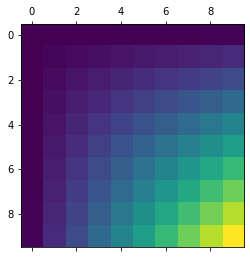

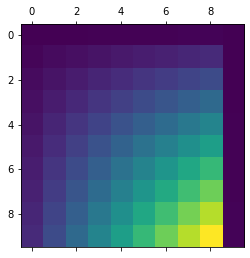

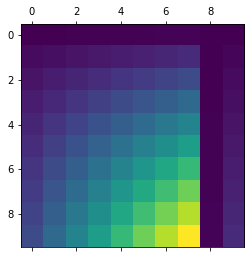

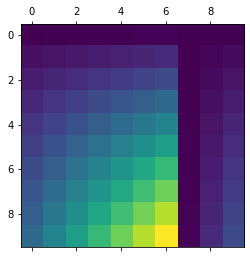

In [131]:
plt.matshow(scores[0,:])
plt.matshow(scores[1,:])
plt.matshow(scores[2,:])
plt.matshow(scores[3,:])

In [132]:
weights = nn.softmax(scores)

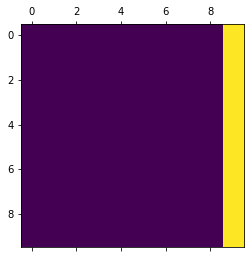

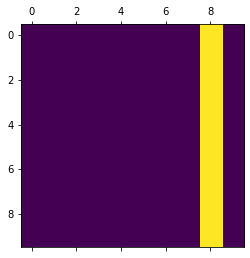

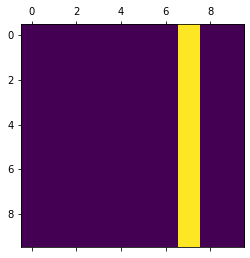

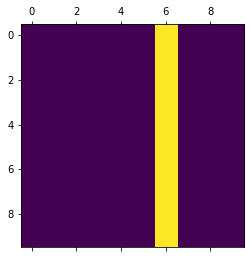

In [134]:
plt.matshow(weights[0,:])
plt.matshow(weights[1,:])
plt.matshow(weights[2,:])
plt.matshow(weights[3,:])